<a href="https://colab.research.google.com/github/engige/nlp_consumer_complaints_classification/blob/main/index_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Customer Complaints Classification
**Authors:** Phase5_Group6: *Mary Musyoka, Julian Kilyungi, Tabitha Kariuki, John Kul, Norah Oluoch and Joseph Ngige.*

## Executive Summary
***

This project leverages Natural Language Processing (NLP) to streamline customer complaint classification, aiming to reduce the time and complexity customers face when submitting complaints. By implementing an NLP model that automatically categorizes complaints based on content, the system eliminates the need for customers to navigate through numerous questions or options. The project’s primary goals are to minimize the time spent on logging complaints and to enhance user experience with a simple, intuitive interface.

To achieve these goals, the project trained and evaluated various machine learning models, including Multinomial Naive Bayes, Support Vector Machine (SVM), Logistic Regression, Random Forest, and an ensemble model (ExtraTrees), before training and selecting a transformer-based model, BERT. The BERT model excelled in handling language tasks, achieving a Macro F1-score of 0.85, Weighted F1-score of 0.89, and an accuracy of 89%, showing strong performance across all complaint categories. The focus on Macro F1-score ensured balanced classification across categories, while Weighted F1 provided a general performance indication across the dataset.

The final solution, deployed on Hugging Face with a user interface built in Streamlit, allows customers to enter their complaint text and contact details, which are processed by the BERT model to classify the complaint. Notifications are sent through an integrated SMS system powered by Africastalking, ensuring designated support teams and customers receive immediate updates.

Future improvements recommedations include implementing a feedback loop to continuously retrain the model with new data, optimizing for specific complaint categories, and expanding notification channels. These enhancements would further improve accuracy, adaptability, and accessibility, aligning the solution with evolving customer needs and strengthening bank responsiveness.

## Project Overview
***

This project leverages Natural Language Processing (NLP) techniques to automatically classify customer complaints. By training an NLP model to understand the content of complaints, the deployed system reduces the number of options or questions customers need to navigate before submitting their issues. The primary goals are:

1. To minimize the time customers spend logging complaints by reducing the number of survey questions.
2. To create a simple user-friendly platform that allows customers to quickly submit their complaints or feedback.

**Objectives:**

* Train an NLP model to automatically classify consumer complaints into predefined categories based on their content.
* Enhance the customer complaint logging experience by streamlining the complaint submission process.
* Improve banks' responsiveness by providing faster, more accurate categorization of complaints.

**Model Training, Evaluation, Improvement & Selection**:

After appropriate data exploration (checks and handling of missing values, duplicates; check on class distribution, text length etc), preprocessing (lowercasing, special character handling, tokenization, stop word removal, lemmatization etc)  and transformation (TF-IDF application, MinMax Scaling etc) the project explored the use of machine learning algorithms that are suitable for text classification such as Multinomial Naive Bayes, Support Vector Machine (SVM), Logistic Regression and Random Forest. We also tested an ensemble model (ExtraTress) and eventually a deep learning, transformer model (BERT) as part of Model Improvement. Both the ensemble and tranformer models achieved strong overall results. Evaluation of model performance was primarily based on the classification report metrics, which include accuracy, precision, recall, and F1-score for each class. The focus metric was Macro F1-score for balanced classification across all complaint categories, supported by Weighted F1-score to account for class imbalance and overall model performance.

We adopted the BERT, transformer model for deployment because of its robust capabilities in handling natural language processing tasks. The BERT model achieved a Macro F1 score is 0.85, Weighted F1 of 0.89 and accuracy of 89%, and showed consistent performance across all classes, ensuring reliable classifications.

**Deployment and Application**:

We developed a user-friendly solution that categorizes complaints efficiently and provides rapid notifications. The application, built with Streamlit and deployed on Hugging Face, features a simple interface where customers can enter their complaint along with their phone and account numbers. Using the pretrained BERT model, the system automatically classifies complaints into predefined categories. An integrated SMS notification system powered by Africastalking sends classified complaints to the designated support team’s phone number and a copy to the customer, ensuring prompt and organized complaint handling.

**Limitations and Future Work**:

While the BERT model performs well overall, its accuracy may vary across certain complaint types, suggesting the need for further tuning or data augmentation. Deployment challenges included restricted SMS delivery, limited to Airtel and Telkom networks due to Safaricom’s promotional message restrictions, and slow email notifications. To enhance the system, we recommend implementing a feedback loop for continuous model retraining, expanding notification channels, and optimizing the model for specific complaint types. These improvements would strengthen the solution's reliability, accessibility, and adaptability, ensuring it meets evolving customer needs and enhances institutional responsiveness.

## Business Understanding
***

**Problem Statement**:

Customers of financial institutions often experience significant frustration and dissatisfaction when lodging complaints related to financial services. The existing complaint submission processes typically involve navigating through multiple selection options or answering a series of questions generated by chatbots. This complexity not only prolongs the time required to submit a complaint but also adds to customer frustration, especially when timely resolution is critical. There is a pressing need for a faster and more efficient method for customers to lodge complaints without the burden of excessive questioning.

**Root Causes**:

* **Complex Navigation Structures:** Current platforms require customers to traverse numerous menus and options, making the submission process cumbersome.

* **Inefficient Chatbot Interactions:** Chatbots often generate redundant or irrelevant questions, leading to extended interaction times and increased customer irritation.

* **Lack of Personalization:** The absence of tailored pathways for different types of complaints results in a one-size-fits-all approach that does not address specific customer needs effectively.

* **Inadequate Data Utilization:** Existing systems may not fully leverage customer data to streamline the complaint submission process, leading to repetitive information requests.

**Key stakeholders:**

**1. Customers:** Play a crucial role in submitting complaints and providing feedback regarding financial services. They are primarily interested in seeking a quick and hassle-free method to lodge complaints and receive timely resolutions. To achieve this, customers require an intuitive and straightforward complaint submission interface that minimizes the number of steps and questions needed to lodge a complaint. Additionally, they seek assurance that their issues will be resolved promptly and effectively.

**2. Customer Service Support Teams:** Responsible for handling and resolving customer complaints efficiently. Their primary interest lies in managing and categorizing incoming complaints swiftly to expedite resolutions. To support these goals, they require simplified complaint categorization processes that speed up resolution times. Additionally, access to comprehensive and accurate complaint data is essential for effective management. Tools that allow them to track and monitor complaint statuses efficiently are also necessary to maintain high levels of service quality.

## Data Understanding
***

The Consumer Complaints Dataset from the Consumer Financial Protection Bureau (CFPB) provides a comprehensive source of real-world data on consumer grievances about various financial products and services. This dataset, accessible to the public, is particularly useful for natural language processing (NLP) projects, as it includes detailed narratives describing consumer complaints. These narratives cover disputes ranging from credit reporting issues to debt collection practices, providing a valuable foundation for developing an NLP model that can automatically classify and route complaints.

The dataset version we leveraged from kaggle includes thousands of consumer submissions categorized into five (5) financial product classes:

* Credit Reporting
* Debt Collection
* Mortgages and Loans (includes car loans, payday loans, student loans, etc.)
* Credit Cards
* Retail Banking (includes checking/savings accounts, as well as money transfers, etc.)


It consists of around 162,400 records, with narratives of varying lengths and detail. Although this categorization streamlined the data, it remains imbalanced, with 56% of complaints relating to credit reporting issues and the remaining categories ranging between 8% and 14%. This imbalance presents a challenge in building an effective model, requiring tailored strategies to ensure accurate and balanced classification across all categories.



## Data Exploration
***

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re

from wordcloud import WordCloud
from collections import Counter

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support, confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesClassifier

from imblearn.over_sampling import SMOTE
import joblib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define the path to the zip file and the CSV file inside it
zip_path = '/content/drive/MyDrive/data_comp.zip'
csv_filename = 'consumer_complaints.csv'

# Open the zip file and load the CSV file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    with zip_ref.open(csv_filename) as file:
        df = pd.read_csv(file)

# Display the first few raws of the dataframe
df.head()

,Unnamed: 0,product,narrative
0,0,credit_card,purchase order day shipping amount receive pro...
1,1,credit_card,forwarded message date tue subject please inve...
2,2,retail_banking,forwarded message cc sent friday pdt subject f...
3,3,credit_reporting,payment history missing credit report speciali...
4,4,credit_reporting,payment history missing credit report made mis...


In [ ]:
# Display basic information about the dataframe
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162421 entries, 0 to 162420
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  162421 non-null  int64 
 1   product     162421 non-null  object
 2   narrative   162411 non-null  object
dtypes: int64(1), object(2)
memory usage: 3.7+ MB


The dataset has 162,421 entries and three columns:

1. **Unnamed: 0:** Appears to be an index column and can be ignored or removed.
2. **product:** Contains the complaint category (target variable) with values like credit_card, retail_banking, credit_reporting, etc.
3. **narrative:** Contains the text of each complaint.

Notably, the narrative column has 10 missing entries.

In [ ]:
# Drop the unnecessary 'Unnamed: 0' column
df = df.drop(columns=['Unnamed: 0'])

# Drop rows with missing values in the 'narrative' column
df = df.dropna(subset=['narrative'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162411 entries, 0 to 162420
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   product    162411 non-null  object
 1   narrative  162411 non-null  object
dtypes: object(2)
memory usage: 3.7+ MB


Unncessary `Unnamed: 0` column dropped and missing values in `narrative` column handled.

In [ ]:
# Check for duplicate rows based on 'product' and 'narrative' columns
duplicates = df.duplicated(subset=['product', 'narrative']).sum()

duplicates

37735

There are 37,735 duplicate entries in the dataset based on the product and narrative columns. However, we opted to keep them since during model selection and training, we noted that removing the duplicates negatively impacted our best model performance.

In [ ]:
# Check the distribution of the 'product' categories
product_distribution = df['product'].value_counts()

product_distribution

,count
product,
credit_reporting,91172
debt_collection,23148
mortgages_and_loans,18990
credit_card,15566
retail_banking,13535


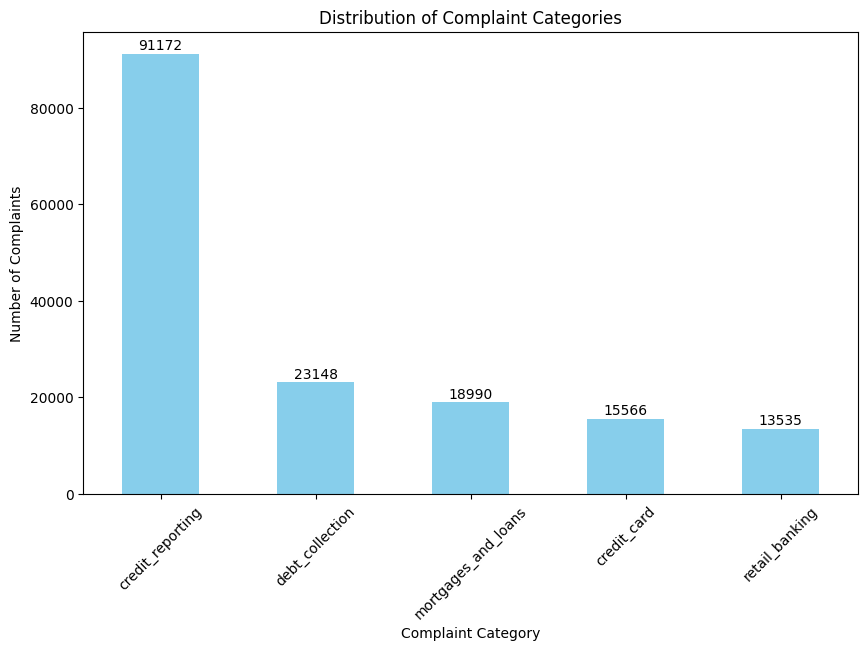

In [ ]:
# Plot the distribution of complaint categories
plt.figure(figsize=(10, 6))
ax = product_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Complaint Categories')
plt.xlabel('Complaint Category')
plt.ylabel('Number of Complaints')
plt.xticks(rotation=45)

# Add count on top of each bar
for i, count in enumerate(product_distribution):
    ax.text(i, count + 200, str(count), ha='center', va='bottom')

plt.show()

The distribution shows a class imbalance, with the credit_reporting category significantly more represented than others. We accounted for the imbalance through stratify parameter when separating the features and target to ensures that the class distribution in the training and testing sets matches that of the original dataset. Synthetic Minority Oversampling Technique (SMOTE) was also applied later to check if it improved model performance.

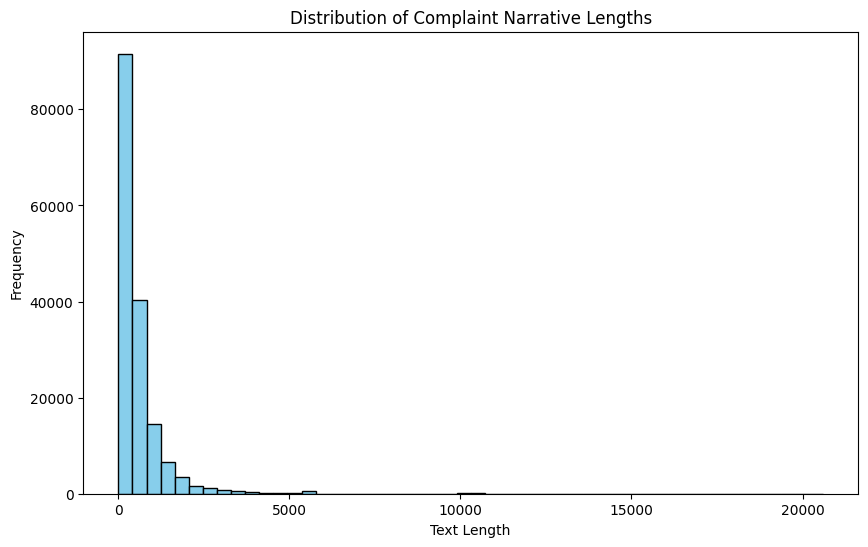

,text_length
count,162411.000000
mean,588.535838
std,830.977413
min,3.000000
25%,192.000000
50%,361.000000
75%,683.000000
max,20596.000000


In [ ]:
# Check the length of the complaint narrative
# Calculate the length of each complaint narrative
df['text_length'] = df['narrative'].apply(len)

# Summary statistics for text length
text_length_summary = df['text_length'].describe()

# Plot the distribution of text length
plt.figure(figsize=(10, 6))
plt.hist(df['text_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Complaint Narrative Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

text_length_summary

The histogram indicates a right-skewed distribution, with most narratives having fewer than 1,000 characters. This information is helpful for choosing an appropriate text processing approach and handling extremely short or long complaints if necessary.

## Data Preprocessing
***

In [ ]:
# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Define the preprocessing function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize
    words = word_tokenize(text)
    # Remove stop words and lemmatize
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    # Join words back into a single string with whitespace handling
    cleaned_text = ' '.join(words).strip()  # Remove leading/trailing whitespace
    return ' '.join(cleaned_text.split())    # Replace multiple spaces with a single space

# Apply preprocessing to the 'narrative' column
df['cleaned_narrative'] = df['narrative'].apply(preprocess_text)

# Display a sample of the cleaned narratives
df[['narrative', 'cleaned_narrative']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,narrative,cleaned_narrative
0,purchase order day shipping amount receive pro...,purchase order day shipping amount receive pro...
1,forwarded message date tue subject please inve...,forwarded message date tue subject please inve...
2,forwarded message cc sent friday pdt subject f...,forwarded message cc sent friday pdt subject f...
3,payment history missing credit report speciali...,payment history missing credit report speciali...
4,payment history missing credit report made mis...,payment history missing credit report made mis...


Key Steps Included:

* **Lowercasing:** Ensures uniformity.
* **Removing Special Characters and Numbers:** Cleans up non-essential elements.
* **Tokenization:** Splits text into words.
* **Stop Word Removal:** Filters out common but non-informative words.
* **Lemmatization:** Reduces words to their root forms.
* **Whitespace Handling:** Trims leading/trailing whitespace and replaces multiple spaces with a single space for consistency.

The pipeline gives  a well-processed cleaned_narrative column, ready for further transformation into numerical features using appropriate techniques.

In [ ]:
# Exploring the number of words
# Count words in each complaint
df['word_count'] = df['cleaned_narrative'].apply(lambda x: len(x.split()))

# Get summary statistics for word counts
word_count_summary = df['word_count'].describe()
print("Word Count Summary:\n", word_count_summary)

Word Count Summary:
 count    162411.000000
mean         80.207935
std         108.821314
min           1.000000
25%          27.000000
50%          50.000000
75%          95.000000
max        2684.000000
Name: word_count, dtype: float64


The word count summary shows that the complaints vary widely in length, with an average of 80 words and a median of 50 words. The standard deviation of 108 suggests significant variability, and the range spans from 1 to 2,684 words, indicating some complaints are very brief while others are extremely detailed. This distribution is right-skewed, with a small number of long complaints inflating the mean. While experimenting on preprocessing and modelling, we noted that filtering the words didn't further didn't improve the models so we kept them as they are.

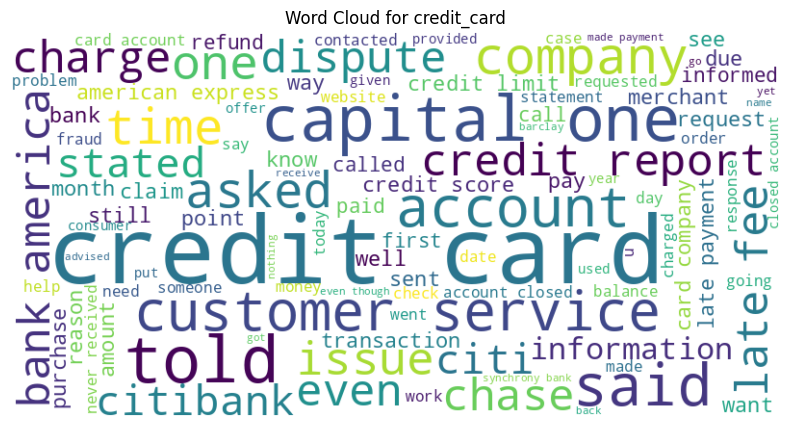

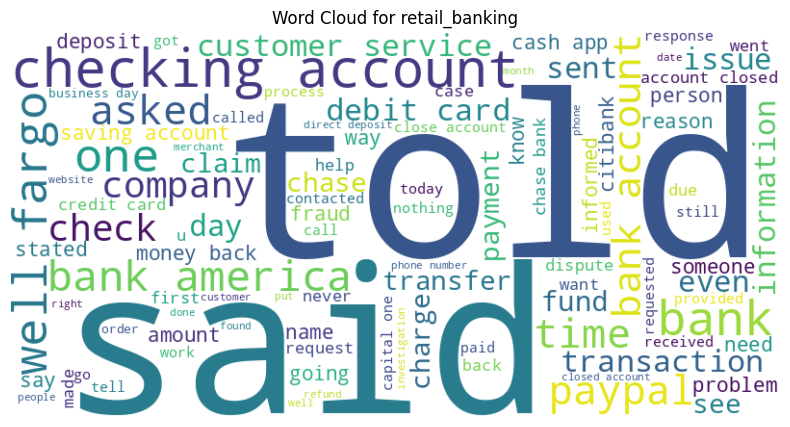

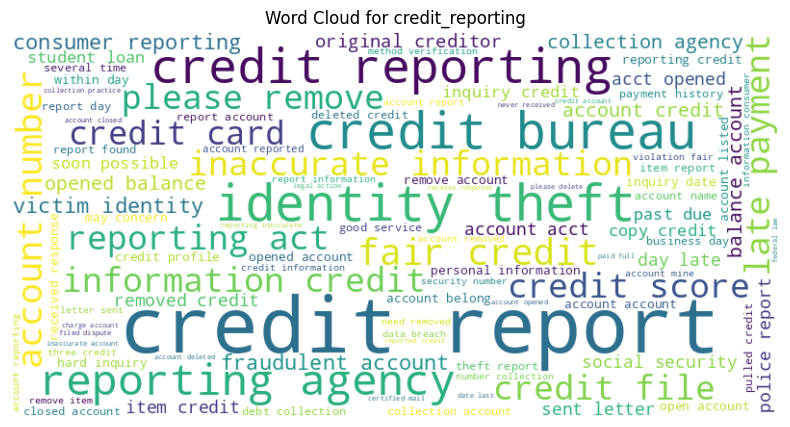

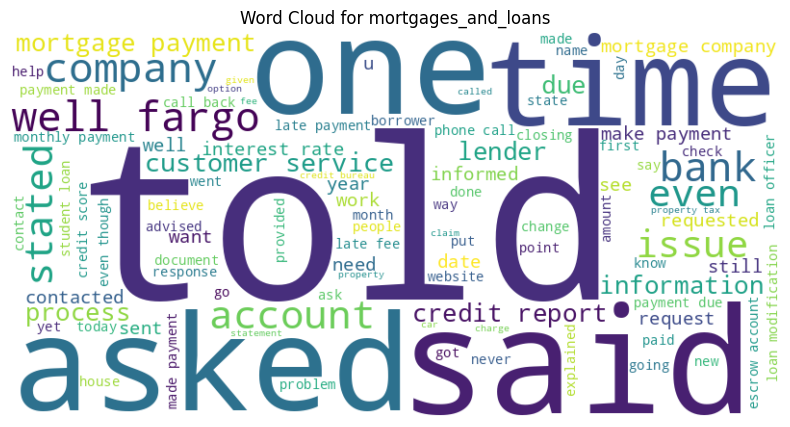

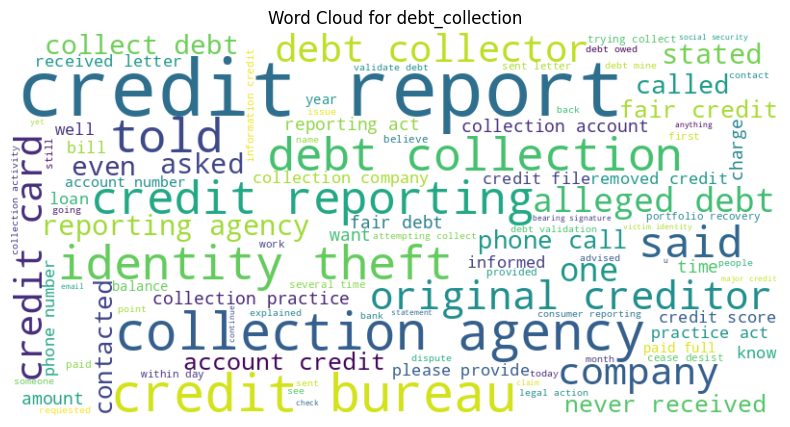

In [ ]:
# Check the most common words in each class
# Function to generate word cloud for each product label
def generate_word_cloud(data, product_label):
    text = ' '.join(data['cleaned_narrative'][data['product'] == product_label])
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {product_label}')
    plt.axis('off')
    plt.show()

# Get unique product labels
product_labels = df['product'].unique()

# Generate and display word cloud for each product label
for label in product_labels:
    generate_word_cloud(df, label)

Brief comments of the word clouds for each product label:

1. **Credit Card:** Key terms include "credit card," "charge," "account," "dispute," and "customer service," indicating frequent issues around charges, disputes, and account management with credit card providers.

2. **Retail Banking:** Words like "checking," "transaction," "account," "bank," and "debit" appear prominently, suggesting common complaints related to checking accounts, bank transactions, and debit cards.

3. **Credit Reporting:** Key words include "credit report," "bureau," "identity theft," and "inaccurate information," reflecting common issues with credit report accuracy, identity theft, and dealing with credit bureaus.

4. **Mortgages and Loans:** Words like "loan," "mortgage," "payment," "account," and "lender" dominate, pointing to frequent concerns with loan applications, mortgage payments, and interactions with lenders.

5. **Debt Collection:** Terms like "debt," "collection," "credit report," "creditor," and "identity theft" are prevalent, indicating issues around debt collection practices, credit reporting, and identity-related problems.

Each word cloud highlights specific terms associated with common issues for each product, showing that customer complaints are centered around distinct themes based on the product type.

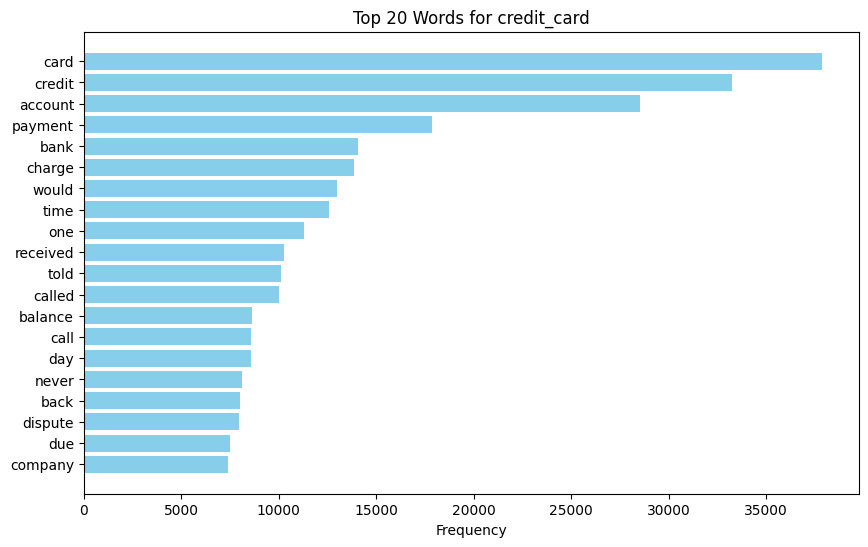

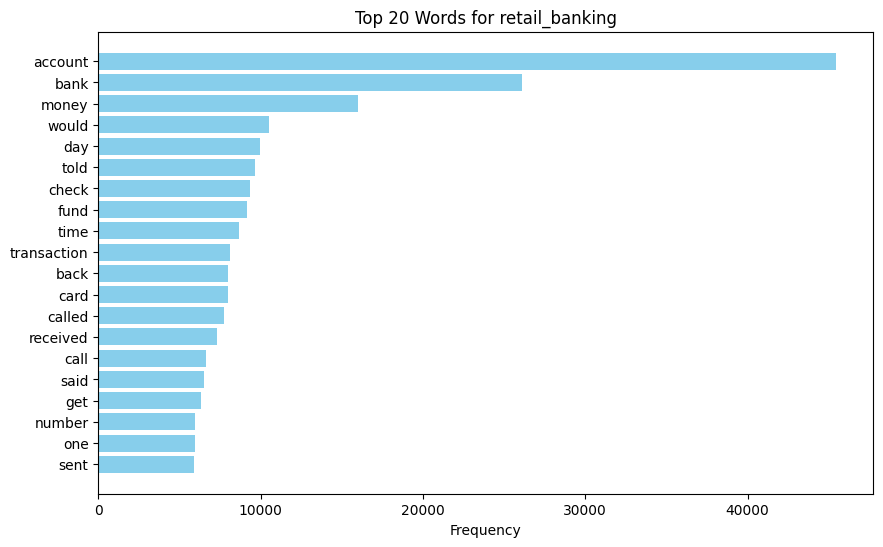

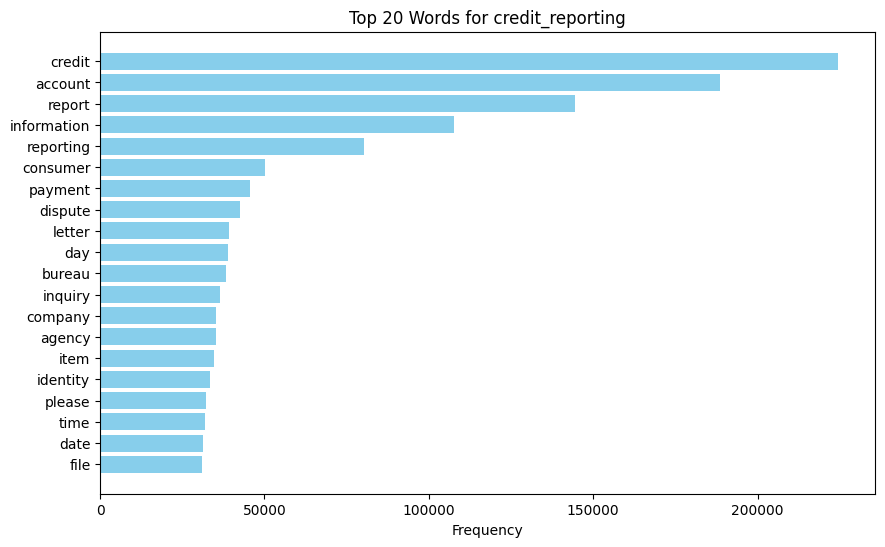

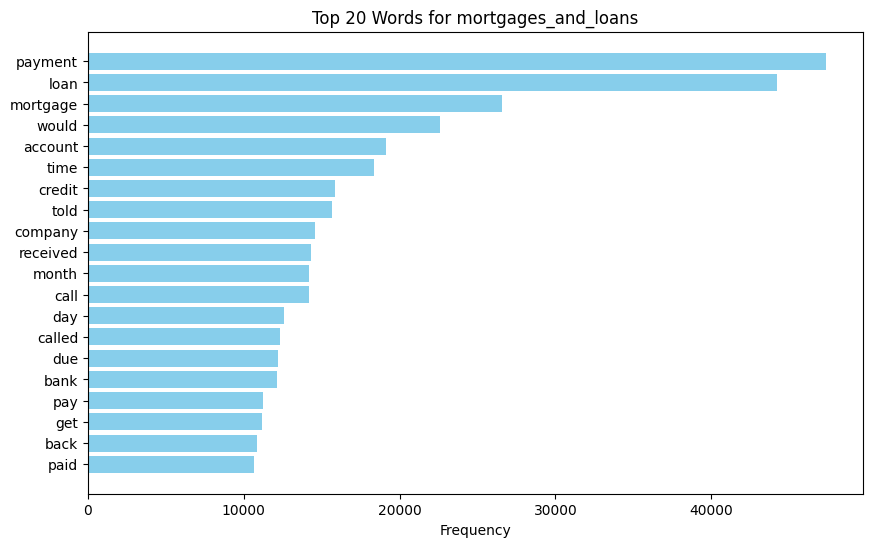

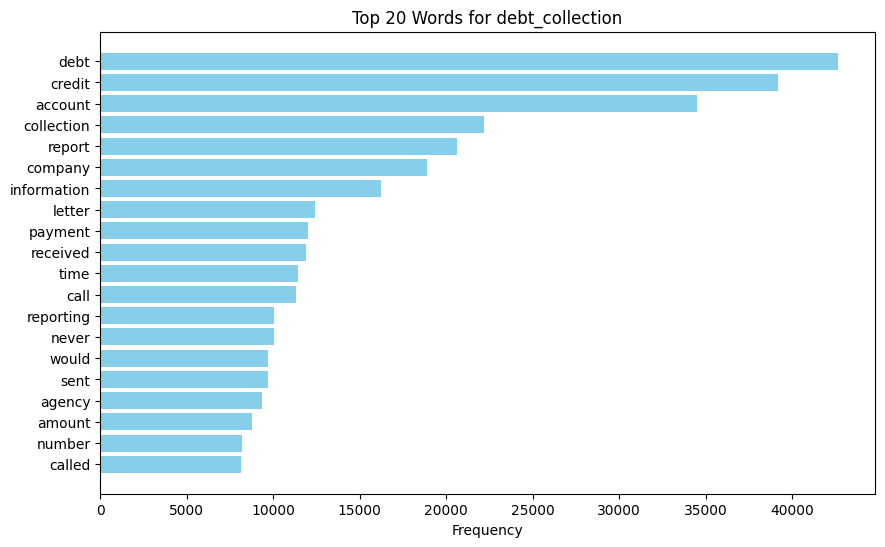

In [ ]:
from collections import Counter

# Plot the top 20 words for each product label
def plot_top_words(data, product_label):
    # Filter data for the specific product label
    text = ' '.join(data['cleaned_narrative'][data['product'] == product_label])
    # Tokenize and count words
    word_counts = Counter(text.split())
    # Get the top 20 most common words
    top_words = word_counts.most_common(20)
    words, counts = zip(*top_words)

    # Plot the top 20 words
    plt.figure(figsize=(10, 6))
    plt.barh(words, counts, color='skyblue')
    plt.xlabel('Frequency')
    plt.title(f'Top 20 Words for {product_label}')
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.show()

# Get unique product labels
product_labels = df['product'].unique()

# Generate and display the top 20 words for each product label
for label in product_labels:
    plot_top_words(df, label)

These visualizations provide an easy way to interpret and compare the key terms across product labels.

In [ ]:
# Calculate text length
if 'text_length' not in df.columns:
    df['text_length'] = df['cleaned_narrative'].apply(len)

# Calculate word count
if 'number_of_words' not in df.columns:
    df['number_of_words'] = df['cleaned_narrative'].apply(lambda x: len(x.split()))

# Add text length column (character count for each narrative)
df['text_length'] = df['cleaned_narrative'].apply(len)

# Add word count column (number of words in each narrative)
df['number_of_words'] = df['cleaned_narrative'].apply(lambda x: len(x.split()))

# Display the relevant columns in the DataFrame
cleaned_df = df[['product', 'cleaned_narrative', 'text_length', 'number_of_words']]

# View the first few rows
cleaned_df.head()

,product,cleaned_narrative,text_length,number_of_words
0,credit_card,purchase order day shipping amount receive pro...,1705,230
1,credit_card,forwarded message date tue subject please inve...,904,132
2,retail_banking,forwarded message cc sent friday pdt subject f...,1230,173
3,credit_reporting,payment history missing credit report speciali...,903,131
4,credit_reporting,payment history missing credit report made mis...,851,123


Created a dataframe which includes the product, cleaned_narrative, text_length, and number_of_words columns for easy inspection.

In [ ]:
# Ensure cleaned_df is a copy of the original DataFrame
cleaned_df = cleaned_df.copy()

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Encode the 'product' column and assign it to the new 'target' column
cleaned_df['target'] = label_encoder.fit_transform(cleaned_df['product'])

# Display the first few rows to verify the target encoding
cleaned_df.head()

,product,cleaned_narrative,text_length,number_of_words,target
0,credit_card,purchase order day shipping amount receive pro...,1705,230,0
1,credit_card,forwarded message date tue subject please inve...,904,132,0
2,retail_banking,forwarded message cc sent friday pdt subject f...,1230,173,4
3,credit_reporting,payment history missing credit report speciali...,903,131,1
4,credit_reporting,payment history missing credit report made mis...,851,123,1


Encoded the product column into numeric labels and assigned it to a new column called target.

In [ ]:
# Create a dictionary to map each product category to its numeric label
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping
print("Mapping of product categories to numeric targets:")
for product, target in label_mapping.items():
    print(f"{product}: {target}")

Mapping of product categories to numeric targets:
credit_card: 0
credit_reporting: 1
debt_collection: 2
mortgages_and_loans: 3
retail_banking: 4


Mapped the product categories to the numeric targets.

## Data Transformation
***

In [ ]:
# Separate the features (X) and target (y)
X = cleaned_df['cleaned_narrative']
y = cleaned_df['target']

# Perform the train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Print the shapes of the resulting splits
print("Training set shapes (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shapes (X_test, y_test):", X_test.shape, y_test.shape)

Training set shapes (X_train, y_train): (129928,) (129928,)
Testing set shapes (X_test, y_test): (32483,) (32483,)


Split the training and testing sets, with class balance maintained across splits through the stratify parameter.

In [ ]:
# Apply TF-IDF transformation
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Apply MinMax Scaling
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both train and test data
X_train_scaled = scaler.fit_transform(X_train_tfidf.toarray())
X_test_scaled = scaler.transform(X_test_tfidf.toarray())

# Print the shapes of the transformed features to verify
print("Scaled Training set shape:", X_train_scaled.shape)
print("Scaled Testing set shape:", X_test_scaled.shape)

Scaled Training set shape: (129928, 5000)
Scaled Testing set shape: (32483, 5000)


Vectorized and scaled the data to provide `X_train_scaled` and `X_test_scaled` transformed features that are ready for modeling

## Modelling
***

### Model Training

#### Multinomial Naive Bayes

In [ ]:
# Initialize and train the Multinomial Naive Bayes model
baseline_nb_model = MultinomialNB()
baseline_nb_model.fit(X_train_scaled, y_train)

#Make predictions on the test set
y_pred_base_nb = baseline_nb_model.predict(X_test_scaled)

# Sort `label_mapping` by numeric target to ensure correct order
target_names = [product for product, target in sorted(label_mapping.items(), key=lambda item: item[1])]

# Calculate accuracy and classification report with target names
accuracy_base_nb = accuracy_score(y_test, y_pred_base_nb)
report_base_nb = classification_report(y_test, y_pred_base_nb, target_names=target_names)

# Display the evaluation scores
print(f"Accuracy (Baseline MultinomialNB): {accuracy_base_nb}")
print("Classification Report (Baseline MultinomialNB):\n", report_base_nb)

Accuracy (Baseline MultinomialNB): 0.8231998276021304
Classification Report (Baseline MultinomialNB):
                      precision    recall  f1-score   support

        credit_card       0.66      0.74      0.70      3113
   credit_reporting       0.90      0.87      0.88     18235
    debt_collection       0.76      0.65      0.70      4630
mortgages_and_loans       0.71      0.86      0.78      3798
     retail_banking       0.80      0.86      0.83      2707

           accuracy                           0.82     32483
          macro avg       0.77      0.79      0.78     32483
       weighted avg       0.83      0.82      0.82     32483



The Multinomial Naive Bayes model achieved a **Macro F1-score of 0.78** and a **Weighted F1-score of 0.82**, indicating moderate overall performance with some variation across classes. The model performs well in identifying **credit_reporting** and **retail_banking** complaints, which have high F1-scores, but struggles with **credit_card** and **debt_collection** categories, where F1-scores are lower. This suggests that while the model is fairly accurate overall (reflected in the Weighted F1), it lacks consistency across all complaint types, as seen in the lower Macro F1.

#### Support Vector Machine (SVM)

In [ ]:
# Initialize and train the SVM model
baseline_svm_model = LinearSVC(max_iter=1000, random_state=42)
baseline_svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_base_svm = baseline_svm_model.predict(X_test_scaled)

# Sort `label_mapping` by numeric target to ensure correct order
target_names = [product for product, target in sorted(label_mapping.items(), key=lambda item: item[1])]

# Calculate accuracy and classification report with target names
accuracy_base_svm = accuracy_score(y_test, y_pred_base_svm)
report_base_svm = classification_report(y_test, y_pred_base_svm, target_names=target_names)

# Display the evaluation scores
print(f"Accuracy (Baseline SVM): {accuracy_base_svm}")
print("Classification Report (Baseline SVM):\n", report_base_svm)

Accuracy (Baseline SVM): 0.8679001323769356
Classification Report (Baseline SVM):
                      precision    recall  f1-score   support

        credit_card       0.78      0.76      0.77      3113
   credit_reporting       0.90      0.93      0.92     18235
    debt_collection       0.80      0.73      0.77      4630
mortgages_and_loans       0.85      0.81      0.83      3798
     retail_banking       0.85      0.86      0.85      2707

           accuracy                           0.87     32483
          macro avg       0.84      0.82      0.83     32483
       weighted avg       0.87      0.87      0.87     32483



The Support Vector Machine (SVM) model achieved a **Macro F1-score of 0.83** and a **Weighted F1-score of 0.87**, demonstrating stronger and more balanced performance across classes compared to the previous Multinomial Naive Bayes model. The SVM model performs especially well on **credit_reporting** with an F1-score of 0.92 and **retail_banking** with an F1-score of 0.85, indicating effective classification in these categories. While **credit_card** and **debt_collection** categories have lower F1-scores (0.77 each), they still show improvement over the Multinomial Naive Bayes model.

#### Logistic Regression

In [ ]:
# Initialize and train the Logistic Regression model
baseline_lr_model = LogisticRegression(max_iter=1000, random_state=42)
baseline_lr_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_base_lr = baseline_lr_model.predict(X_test_scaled)

# Sort `label_mapping` by numeric target to ensure correct order
target_names = [product for product, target in sorted(label_mapping.items(), key=lambda item: item[1])]

# Calculate accuracy and classification report with target names
accuracy_base_lr = accuracy_score(y_test, y_pred_base_lr)
report_base_lr = classification_report(y_test, y_pred_base_lr, target_names=target_names)

# Display the evaluation scores
print(f"Accuracy (Baseline Logistic Regression): {accuracy_base_lr}")
print("Classification Report (Baseline Logistic Regression):\n", report_base_lr)

Accuracy (Baseline Logistic Regression): 0.8732259951359173
Classification Report (Baseline Logistic Regression):
                      precision    recall  f1-score   support

        credit_card       0.79      0.78      0.78      3113
   credit_reporting       0.91      0.94      0.92     18235
    debt_collection       0.81      0.73      0.77      4630
mortgages_and_loans       0.85      0.82      0.84      3798
     retail_banking       0.87      0.87      0.87      2707

           accuracy                           0.87     32483
          macro avg       0.85      0.83      0.84     32483
       weighted avg       0.87      0.87      0.87     32483



The Logistic Regression model achieved a **Macro F1-score of 0.84** and a **Weighted F1-score of 0.87**, demonstrating solid and balanced performance across classes, similar to the SVM model. This model performs particularly well on **credit_reporting** with an F1-score of 0.92 and **retail_banking** with an F1-score of 0.87, indicating effective classification in these categories. The **credit_card** and **debt_collection** categories have lower F1-scores of 0.78 and 0.77, respectively, which are comparable to the results from the SVM model. Compared to SVM, Logistic Regression shows slightly higher F1-scores in **mortgages_and_loans** and **retail_banking**, but overall performance is very close.

#### Random Forest

In [ ]:
# Initialize and train the Random Forest model
baseline_rf_model = RandomForestClassifier(random_state=42)
baseline_rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_base_rf = baseline_rf_model.predict(X_test_scaled)

# Sort `label_mapping` by numeric target to ensure correct order
target_names = [product for product, target in sorted(label_mapping.items(), key=lambda item: item[1])]

# Calculate accuracy and classification report with target names
accuracy_base_rf = accuracy_score(y_test, y_pred_base_rf)
report_base_rf = classification_report(y_test, y_pred_base_rf, target_names=target_names)

# Display the evaluation scores
print(f"Accuracy (Baseline Random Forest): {accuracy_base_rf}")
print("Classification Report (Baseline Random Forest):\n", report_base_rf)

Accuracy (Baseline Random Forest): 0.8847704953360219
Classification Report (Baseline Random Forest):
                      precision    recall  f1-score   support

        credit_card       0.82      0.72      0.77      3113
   credit_reporting       0.90      0.97      0.93     18235
    debt_collection       0.89      0.73      0.80      4630
mortgages_and_loans       0.88      0.80      0.84      3798
     retail_banking       0.86      0.86      0.86      2707

           accuracy                           0.88     32483
          macro avg       0.87      0.82      0.84     32483
       weighted avg       0.88      0.88      0.88     32483



The Random Forest model achieved a **Macro F1-score of 0.84** and a **Weighted F1-score of 0.88**, indicating robust and balanced performance across all classes. It excels in **credit_reporting** with an F1-score of 0.93 and **retail_banking** with an F1-score of 0.86. The **credit_card** and **debt_collection** categories show moderate performance, with F1-scores of 0.77 and 0.80, respectively. Compared to previous models like SVM and Logistic Regression, Random Forest demonstrates a slightly higher Weighted F1-score, suggesting better performance on the more frequent classes. Its Macro F1-score remains comparable to those of Logistic Regression and SVM, indicating consistent classification across all categories. Random Forest is a slightly stronger model overall due to its improved accuracy and reliability on both major and minor classes.

### Model Evaluation

The evaluation of model performance is primarily based on the **classification report metrics**, which include **accuracy**, **precision**, **recall**, and **F1-score** for each class. Here is a brief overview of these metrics:

- **Accuracy**: This is the overall ratio of correctly predicted instances to total instances. It gives a general indication of the model's performance, though it can be misleading for imbalanced datasets.
- **Precision**: This metric represents the ratio of true positive predictions to the total positive predictions (true positives + false positives). High precision indicates that the model has a low false positive rate for a class.
- **Recall**: Recall is the ratio of true positives to the total actual positives (true positives + false negatives). High recall means the model successfully identifies most instances of a class.
- **F1-score**: The F1-score is the harmonic mean of precision and recall, providing a balanced measure when both metrics are important. It is particularly useful in cases of class imbalance.

The focus metric is **Macro F1-score**, supported by **Weighted F1-score**. Macro F1 is an unweighted average across all classes, treating each class equally, which aligns with the project's goal to accurately classify all customer complaint categories, regardless of class frequency. Weighted F1, on the other hand, considers class imbalance by giving higher weight to larger classes, providing a general indication of model performance across the dataset.

For the model selected for deployment, we also included a **confusion matrix** and an **AUC-ROC curve** to further assess performance. The confusion matrix visualizes true positive, false positive, true negative, and false negative rates across classes, allowing us to identify specific areas of misclassification. The AUC-ROC (Area Under the Receiver Operating Characteristic Curve) provides an aggregate measure of performance across all classification thresholds. A higher AUC indicates better distinction between classes.

The next section will focus on **Model Improvement**. We begun by tuning the **Random Forest** model (our best-performing model so far) to evaluate if parameter adjustments can enhance performance. We then applied **SMOTE** (Synthetic Minority Over-sampling Technique) to address class imbalance and trained a baseline Random Forest model and an ensemble model on the balanced dataset. Finally, we experimented with a **transformer-based model** (BERT) to benchmark performance. Based on the evaluations and model fit for text classification tasks, we selected the most suitable model for deployment.

### Model Improvement

#### Tuned Random Forest

In [ ]:
# Define the parameter distribution for RandomizedSearch
param_dist = {
    'n_estimators': [100, 200, 300, 500],           # Number of trees
    'max_depth': [10, 20, 30, None],                # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],                # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]                      # Use bootstrap samples
}

# Initialize the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=10,
    scoring='accuracy',
    cv=2,
    verbose=1,
    random_state=42,
    n_jobs=2
)

# Perform the random search on the training data
random_search.fit(X_train_scaled, y_train)

# Get the best model from the search
best_rf_model = random_search.best_estimator_

# Make predictions on the test set
y_pred_tuned_rf = best_rf_model.predict(X_test_scaled)

# Sort `label_mapping` by numeric target to ensure correct order
target_names = [product for product, target in sorted(label_mapping.items(), key=lambda item: item[1])]

# Calculate accuracy and classification report with target names
accuracy_tuned_rf = accuracy_score(y_test, y_pred_tuned_rf)
report_tuned_rf = classification_report(y_test, y_pred_tuned_rf, target_names=target_names)

# Display the best parameters and evaluation scores
print("Best Parameters:", random_search.best_params_)
print(f"Accuracy (Tuned Random Forest): {accuracy_tuned_rf}")
print("Classification Report (Tuned Random Forest):\n", report_tuned_rf)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': False}
Accuracy (Tuned Random Forest): 0.8917895514576856
Classification Report (Tuned Random Forest):
                      precision    recall  f1-score   support

        credit_card       0.82      0.75      0.78      3113
   credit_reporting       0.91      0.97      0.94     18235
    debt_collection       0.88      0.75      0.81      4630
mortgages_and_loans       0.88      0.82      0.85      3798
     retail_banking       0.86      0.87      0.86      2707

           accuracy                           0.89     32483
          macro avg       0.87      0.83      0.85     32483
       weighted avg       0.89      0.89      0.89     32483



The **tuned Random Forest model** achieved a **Macro F1-score of 0.85**, and a **Weighted F1-score of 0.89**. These metrics indicate a slight improvement over the baseline Random Forest model, suggesting that tuning has contributed to more balanced performance across all classes. Notably, the **credit_reporting** category achieved a high F1-score of 0.94, while **retail_banking** maintained an F1-score of 0.86, both showing strong classification results. The **credit_card** and **debt_collection** classes show moderate F1-scores of 0.78 and 0.81, respectively, indicating that while there is some improvement, these categories may still benefit from further tuning or additional handling techniques like SMOTE.

In [ ]:
# Reprocess data with SMOTE application
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply TF-IDF transformation
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Apply MinMax Scaling
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both train and test data
X_train_scaled = scaler.fit_transform(X_train_tfidf.toarray())
X_test_scaled = scaler.transform(X_test_tfidf.toarray())

# Print the shapes of the transformed features to verify
print("Scaled Training set shape before SMOTE:", X_train_scaled.shape)
print("Scaled Testing set shape:", X_test_scaled.shape)

# Apply SMOTE on the scaled training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Print the shapes of the resampled training set to verify
print("Resampled Training set shape:", X_train_resampled.shape)
print("Resampled Training target shape:", y_train_resampled.shape)

Scaled Training set shape before SMOTE: (129928, 5000)
Scaled Testing set shape: (32483, 5000)
Resampled Training set shape: (364445, 5000)
Resampled Training target shape: (364445,)


The training dataset has expanded significantly from 129,928 to 364,445 samples, after applying SMOTE. This increase reflects the oversampling of the minority classes to achieve a balanced distribution across all classes, as indicated by the equal size of the resampled target shape. With this balance, the model will be less biased toward majority classes, improving its ability to learn patterns from minority classes, which may lead to better generalization and fairer performance across all categories. However, the larger dataset size may increase the computational load during model training.

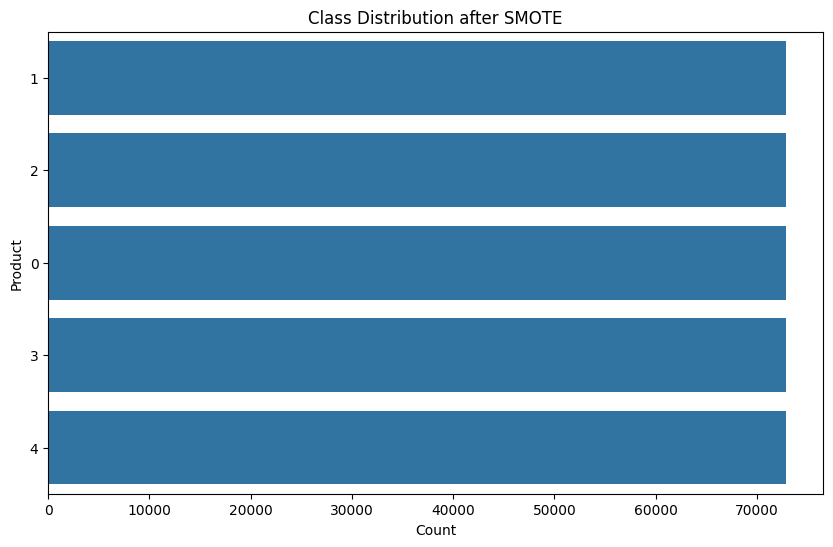

In [ ]:
# Print the new class distribution
plt.figure(figsize=(10, 6))
sns.countplot(y=y_train_resampled, order=pd.Series(y_train_resampled).value_counts().index)
plt.title('Class Distribution after SMOTE')
plt.xlabel('Count')
plt.ylabel('Product')
plt.show()

The chart shows a perfectly balanced class distribution after applying SMOTE, with each product category having an equal count of samples (approximately 73,000). This indicates that SMOTE has successfully oversampled the minority classes, ensuring uniform representation across all categories. This balanced distribution should help the model learn patterns more evenly across classes, reducing the bias toward majority classes and potentially improving classification performance on underrepresented categories.

#### Random Forest with SMOTE

In [ ]:
# Initialize and train the Random Forest model
baseline_rf_model = RandomForestClassifier(random_state=42)
baseline_rf_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_base_rf = baseline_rf_model.predict(X_test_scaled)

# Sort `label_mapping` by numeric target to ensure correct order
target_names = [product for product, target in sorted(label_mapping.items(), key=lambda item: item[1])]

# Calculate accuracy and classification report
accuracy_base_rf = accuracy_score(y_test, y_pred_base_rf)
report_base_rf = classification_report(y_test, y_pred_base_rf, target_names=target_names)

# Display the evaluation scores
print(f"Accuracy (Baseline Random Forest): {accuracy_base_rf}")
print("Classification Report (Baseline Random Forest):\n", report_base_rf)

Accuracy (Baseline Random Forest): 0.8921281901302219
Classification Report (Baseline Random Forest):
                      precision    recall  f1-score   support

        credit_card       0.77      0.79      0.78      3132
   credit_reporting       0.94      0.94      0.94     18283
    debt_collection       0.84      0.82      0.83      4615
mortgages_and_loans       0.85      0.85      0.85      3770
     retail_banking       0.85      0.86      0.86      2683

           accuracy                           0.89     32483
          macro avg       0.85      0.85      0.85     32483
       weighted avg       0.89      0.89      0.89     32483



The **baseline Random Forest model with SMOTE** applied shows a **Macro F1 score of 0.85** and a **Weighted F1 score of 0.89**. Compared to the tuned Random Forest model without SMOTE, the Macro F1 score remains consistent at 0.85, while the Weighted F1 score is slightly lower. However, SMOTE has improved the balance across classes, as seen in the more consistent recall values, especially in minority classes like **credit_car** and **debt_collection**. This indicates that SMOTE has helped the model handle class imbalance better, ensuring more reliable performance across all categories. The tuned model without SMOTE achieved slightly higher precision and F1 in dominant classes, but SMOTE provides a more equitable focus on all classes, aligning well with the goal of accurately capturing complaints across categories.

#### Ensemble Model

##### ExtraTrees with SMOTE

In [ ]:
# Initialize the Extra Trees Classifier
et_model = ExtraTreesClassifier(n_estimators=100, random_state=42)

# Train the model
et_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_base_et = et_model.predict(X_test_scaled)

# Sort `label_mapping` by numeric target to ensure correct order
target_names = [product for product, target in sorted(label_mapping.items(), key=lambda item: item[1])]

# Calculate accuracy and classification report
accuracy_et = accuracy_score(y_test, y_pred_base_et)
report_et = classification_report(y_test, y_pred_base_et, target_names=target_names)

# Display the evaluation scores
print(f"Accuracy (Extra Trees): {accuracy_et}")
print("Classification Report (Extra Trees):\n", report_et)

Accuracy (Extra Trees): 0.8986854662438815
Classification Report (Extra Trees):
                      precision    recall  f1-score   support

        credit_card       0.78      0.82      0.80      3132
   credit_reporting       0.95      0.94      0.95     18283
    debt_collection       0.86      0.81      0.83      4615
mortgages_and_loans       0.84      0.87      0.86      3770
     retail_banking       0.86      0.88      0.87      2683

           accuracy                           0.90     32483
          macro avg       0.86      0.86      0.86     32483
       weighted avg       0.90      0.90      0.90     32483



The Extra Trees model with SMOTE achieves a strong overall performance, with an accuracy of 89.87% and high scores across precision, recall, and F1 metrics. The **Macro F1 score is 0.86**, which suggests balanced performance across all classes, while the **Weighted F1 score is 0.90**, indicating a reliable performance across both majority and minority classes, consistent with the project goal of accurately classifying customer complaints. Notably, the recall for "credit_reporting" and "retail_banking" classes is very high at 0.94 and 0.88, respectively, which improves the model's ability to correctly identify these categories.

Comparing this to the Random Forest model with SMOTE, the Extra Trees model demonstrates similar strengths but with slightly higher precision and F1 scores for most classes. Specifically, the **Weighted F1** is slightly higher for Extra Trees (0.90 compared to Random Forest’s 0.89), indicating that Extra Trees may handle the SMOTE-balanced data slightly better. This could be attributed to Extra Trees' randomized split selection, which enhances its robustness. Overall, Extra Trees with SMOTE is showing promising results and could be considered a strong candidate for deployment.

In [ ]:
# Define the path
model_path = '/content/drive/MyDrive/extra_trees_model.joblib'

# Save the Extra Trees model
joblib.dump(et_model, model_path)
print(f"Model saved to {model_path}")

# Load the Extra Trees model
loaded_et_model = joblib.load(model_path)
print("Model loaded successfully!")

Model saved to /content/drive/MyDrive/extra_trees_model.joblib
Model loaded successfully!


In [ ]:
# Example new data
new_data = [
   "I am very unhappy with the service on my credit card.",
    "My mortgage application was declined without any valid reason.",
    "I have been getting spam calls from a loan company.",
    "The bank charged me extra fees without prior notice.",
    "The insurance company is not processing my claim."
]

# Preprocess the new data
new_data_tfidf = tfidf_vectorizer.transform(new_data)  # Use the same vectorizer
new_data_scaled = scaler.transform(new_data_tfidf.toarray())  # Use the same scaler

# Predict the category for each new data entry
predictions = et_model.predict(new_data_scaled)

# Map predictions to category names
label_mapping = {0: "credit_card", 1: "credit_reporting", 2: "debt_collection", 3: "mortgages_and_loans", 4: "retail_banking"}
predicted_categories = [label_mapping[pred] for pred in predictions]

# Print the predictions
for text, category in zip(new_data, predicted_categories):
    print(f"Complaint: {text}\nPredicted Category: {category}\n")

Complaint: I am very unhappy with the service on my credit card.
Predicted Category: credit_card

Complaint: My mortgage application was declined without any valid reason.
Predicted Category: mortgages_and_loans

Complaint: I have been getting spam calls from a loan company.
Predicted Category: mortgages_and_loans

Complaint: The bank charged me extra fees without prior notice.
Predicted Category: retail_banking

Complaint: The insurance company is not processing my claim.
Predicted Category: debt_collection



#### Transformer Model

##### Bidirectional Encoder Representations from Transformers (BERT)

In [ ]:
!pip install transformers torch datasets scikit-learn

In [ ]:
!pip install datasets

In [ ]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments, EarlyStoppingCallback
from datasets import Dataset

# Load the BERT tokenizer and model
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=len(set(y_train)))

# Tokenize the data
def tokenize_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True, max_length=128)

# Prepare the datasets
train_dataset = Dataset.from_dict({"text": X_train, "label": y_train}).map(tokenize_function, batched=True)
test_dataset = Dataset.from_dict({"text": X_test, "label": y_test}).map(tokenize_function, batched=True)

train_dataset = train_dataset.with_format("torch")
test_dataset = test_dataset.with_format("torch")

# Define the evaluation metric function
def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    accuracy = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="weighted")
    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1
    }

# Define training arguments with early stopping
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=10,
    logging_dir="./logs",
    logging_steps=10,
    save_total_limit=2,
    metric_for_best_model="f1",
    greater_is_better=True
)

# Trainer with early stopping callback
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]  # Stops if validation does not improve for 3 epochs
)

# Train the model
trainer.train()

# Evaluate the model
eval_results = trainer.evaluate()
print("Evaluation Results:", eval_results)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/129928 [00:00<?, ? examples/s]

Map:   0%|          | 0/32483 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.478500,0.515624,0.873195,0.872113,0.873195,0.870575
2,0.631200,0.563464,0.873472,0.872295,0.873472,0.870580
3,0.193000,0.536766,0.877875,0.876433,0.877875,0.876300
4,0.543000,0.518722,0.877536,0.876623,0.877536,0.875503
5,0.272900,0.489602,0.881907,0.881155,0.881907,0.880887


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.478500,0.515624,0.873195,0.872113,0.873195,0.870575
2,0.631200,0.563464,0.873472,0.872295,0.873472,0.870580
3,0.193000,0.536766,0.877875,0.876433,0.877875,0.876300
4,0.543000,0.518722,0.877536,0.876623,0.877536,0.875503
5,0.272900,0.489602,0.881907,0.881155,0.881907,0.880887
6,0.469700,0.583751,0.819660,0.811559,0.819660,0.793822
7,0.352000,0.547390,0.886802,0.885681,0.886802,0.886068
8,0.512600,0.545489,0.887295,0.885797,0.887295,0.886137
9,0.351600,0.556751,0.889019,0.888627,0.889019,0.888743
10,0.225200,0.577121,0.888773,0.887743,0.888773,0.888078


Evaluation Results: {'eval_loss': 0.5567514896392822, 'eval_accuracy': 0.8890188714096604, 'eval_precision': 0.8886272511800908, 'eval_recall': 0.8890188714096604, 'eval_f1': 0.8887425872105229, 'eval_runtime': 216.4612, 'eval_samples_per_second': 150.064, 'eval_steps_per_second': 18.761, 'epoch': 10.0}


In [ ]:
# Get predictions on the test set
predictions = trainer.predict(test_dataset)

# Extract the predicted labels and true labels
preds = np.argmax(predictions.predictions, axis=1)
labels = predictions.label_ids

# Create a list of class names in the correct order for target_names
# Sort `label_mapping` by numeric target to ensure correct order
target_names = [product for product, target in sorted(label_mapping.items(), key=lambda item: item[1])]

# Generate and print the classification report
report = classification_report(labels, preds, target_names=target_names)
print("Classification Report:\n", report)

Classification Report:
                      precision    recall  f1-score   support

        credit_card       0.81      0.79      0.80      3113
   credit_reporting       0.93      0.94      0.93     18235
    debt_collection       0.81      0.80      0.81      4630
mortgages_and_loans       0.86      0.84      0.85      3798
     retail_banking       0.86      0.90      0.88      2707

           accuracy                           0.89     32483
          macro avg       0.85      0.85      0.85     32483
       weighted avg       0.89      0.89      0.89     32483



The BERT transformer model demonstrates solid performance with an overall **accuracy** of 89% and **Weighted F1** of 0.89. The **Macro F1** score is 0.85, showing consistent performance across classes, though slightly lower than that of the Extra Trees model with SMOTE (which achieved a Macro F1 of 0.86). BERT's **recall** is particularly strong for the "credit_reporting" (0.94) and "retail_banking" (0.90) classes, which are also categories that had high recall scores in the Extra Trees model.

Compared to Extra Trees, BERT provides similar precision and F1 scores for the major classes but with slightly lower F1 scores on average. Given that BERT is computationally more intensive than Extra Trees, the slight improvement in balanced performance from Extra Trees could make it a more efficient choice for deployment. However, BERT's strong language modeling capabilities might still make it advantageous for complex or nuanced text classification tasks if computational resources are available.

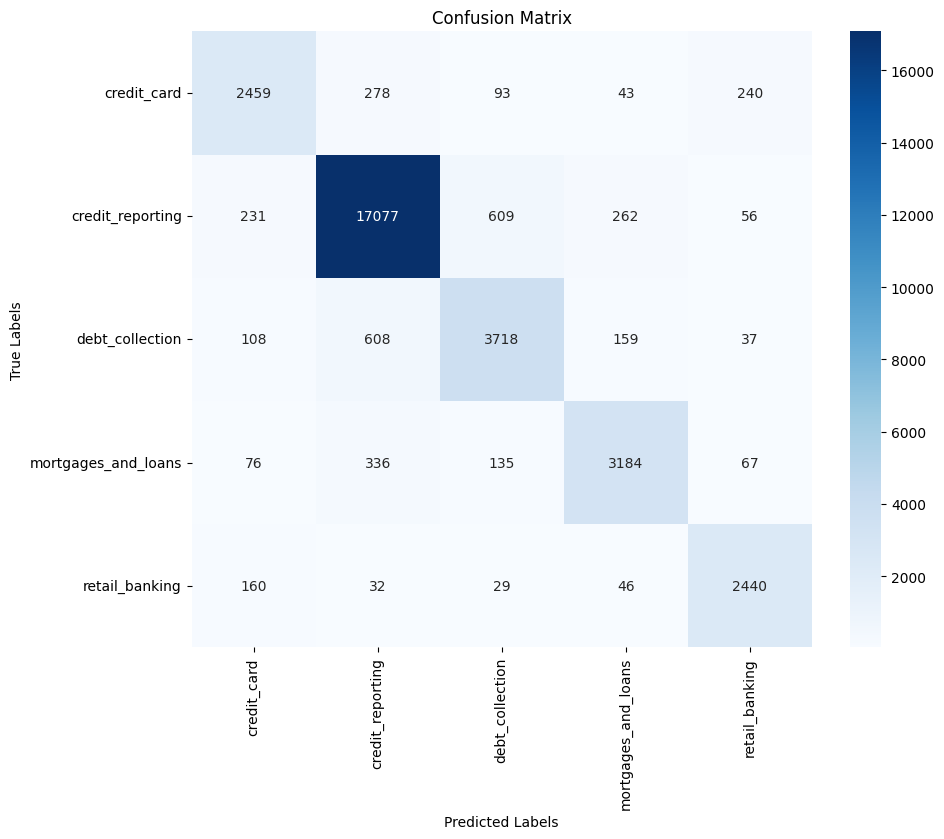

In [ ]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(labels, preds)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

The confusion matrix for the BERT model indicates strong classification performance, particularly in the **credit_reporting** category, with most predictions correctly identified (17,077 correct out of 18,235 instances). There is some misclassification among similar financial categories, notably with **debt_collection** and **credit_card**, where instances are occasionally misidentified as one another, reflecting the overlap in complaint content within these areas. Overall, the matrix reflects good differentiation across categories, with relatively few off-diagonal errors.

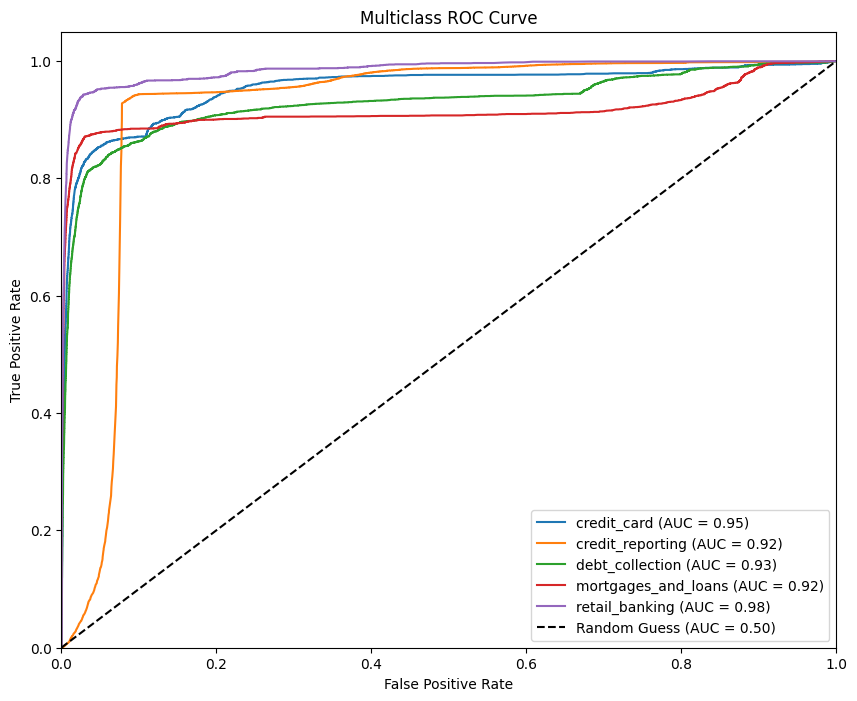

In [ ]:
# AUC-ROC Curve
# Binarize the labels for multiclass ROC
labels_binarized = label_binarize(labels, classes=np.arange(len(target_names)))
preds_proba = predictions.predictions  # Use the raw prediction logits

# Plot the ROC curve for each class
plt.figure(figsize=(10, 8))
for i, class_name in enumerate(target_names):
    fpr, tpr, _ = roc_curve(labels_binarized[:, i], preds_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{class_name} (AUC = {roc_auc:.2f})")

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.50)")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="lower right")
plt.show()

The AUC-ROC curve for the BERT model demonstrates high discriminative power across all complaint categories, with AUC values ranging from **0.92 to 0.98**. The **retail_banking** category shows the highest AUC (0.98), indicating excellent classification performance, while other categories like **credit_card** (AUC 0.95) and **debt_collection** (AUC 0.93) also perform well. Overall, these curves reflect a strong ability of the model to distinguish between classes, supporting its robustness in handling multiclass classification.

In [ ]:
# Define the directory where the model and tokenizer are saved
output_dir = "/content/drive/MyDrive/saved_bert_model"

# Save the model
trainer.save_model(output_dir)

# Save the tokenizer as well (important for loading the model later)
tokenizer.save_pretrained(output_dir)

print(f"Model and tokenizer saved to {output_dir}")

Model and tokenizer saved to /content/drive/MyDrive/saved_bert_model


In [ ]:
# Load the tokenizer and model
loaded_tokenizer = BertTokenizer.from_pretrained(output_dir)
loaded_model = BertForSequenceClassification.from_pretrained(output_dir)

print("Model and tokenizer loaded successfully!")

Model and tokenizer loaded successfully!


In [ ]:
# Define the prediction function
def classify_text(text):
    # Tokenize the input text
    inputs = loaded_tokenizer(text, return_tensors="pt", truncation=True, padding="max_length", max_length=128)

    # Move inputs to the same device as the model (CPU or GPU)
    inputs = {key: value.to(loaded_model.device) for key, value in inputs.items()}

    # Perform inference
    with torch.no_grad():
        outputs = loaded_model(**inputs)

    # Get the predicted label (argmax over logits)
    predicted_label = torch.argmax(outputs.logits, dim=1).item()

    return predicted_label

# Define a mapping for labels to class names
label_map = {
    0: "credit_card",
    1: "retail_banking",
    2: "credit_reporting",
    3: "mortgages_and_loans",
    4: "debt_collection"
}

# Classify new examples
new_texts = [
    "I am very unhappy with the service on my credit card.",
    "My mortgage application was declined without any valid reason.",
    "I have been getting spam calls from a loan company.",
    "The bank charged me extra fees without prior notice.",
    "The insurance company is not processing my claim."
]

# Run classification and print results with class names
for text in new_texts:
    label_id = classify_text(text)
    label_name = label_map[label_id]
    print(f"Text: {text}\nPredicted Category: {label_name}\n")

Text: I am very unhappy with the service on my credit card.
Predicted Category: credit_card

Text: My mortgage application was declined without any valid reason.
Predicted Category: mortgages_and_loans

Text: I have been getting spam calls from a loan company.
Predicted Category: mortgages_and_loans

Text: The bank charged me extra fees without prior notice.
Predicted Category: debt_collection

Text: The insurance company is not processing my claim.
Predicted Category: credit_reporting



### Model Selection

After evaluating various models, we decided to select the **BERT model** for deployment, despite the slightly better performance of the **ExtraTrees model** in certain metrics. The choice was influenced by BERT’s specific advantages in handling natural language processing tasks.

1. **Reasons for Selecting BERT**:  
   - **Natural Language Suitability**: BERT is explicitly designed for understanding the nuances of human language. It can better capture contextual meanings and subtleties within text, making it well-suited for accurately classifying customer complaints.
   - **Generalization Potential**: BERT is pretrained on large corpora, enabling it to generalize well to new, unseen data. This makes it particularly valuable in scenarios where language variations and evolving terms might be present, as is often the case in customer complaints.

2. **Drawbacks of BERT**:  
   - **Computational Demands**: BERT requires significant computational resources for both training and inference, which can be a drawback in resource-limited environments. However, given the availability of sufficient computational resources, this becomes manageable.
   - **Interpretability Challenges**: BERT’s deep learning architecture makes it harder to interpret compared to traditional models like ExtraTrees. This can be a limitation when there is a need for clear and explainable decision-making processes.

Overall, BERT’s ability to handle complex language structures provides a strategic advantage in accurately classifying customer complaints, ensuring better long-term performance and hence recommended for deployment.

## Deployment and Application
***

**Deployment and Application**

To address the project’s goal of simplifying the customer complaint process, we developed and deployed a streamlined solution focused on efficiency, ease of use, and quick issue categorization.

1. **Simplified Customer Experience**: The deployment includes a user-friendly interface built using Streamlit, which allows bank customers to enter their complaint along with their phone number and account number. This interface accepts customer inputs and classifies complaints into predefined categories based on the model’s predictions, simplifying the complaint submission experience.

2. **Model Integration**: The pretrained BERT model, was integrated into an application developed using Streamlit to provide real-time classification of complaints. Customers input their complaint text into the Streamlit user interface, which the model then processes to determine the correct complaint category.

3. **Automated Notification System**: To ensure quick and accurate response to complaints, we integrated Africastalking's bulk SMS API for notifications. The classified complaint triggers notifications sent directly to the designated customer support team phone numbers, based on complaint type. Additionally, the system sends a copy of the complaint to the customer’s phone number for their record. This SMS-based approach was chosen over email notifications due to delays experienced with email delivery.

4. **Deployment on Hugging Face**: The model and Streamlit interface were deployed on Hugging Face, making it accessible through a link that bank customers can use directly. By clicking the link, customers access the complaint input interface, submit their information, and the system takes care of categorizing the complaint and notifying the appropriate support team. This approach allows customers to have their complaints routed efficiently without navigating through complex selection options or long questionnaires.

5. **Continuous Improvement**: Although a feedback loop was not implemented in the initial deployment, it is recommended as a next step. This would enable continuous model retraining with new complaint data, ensuring improved accuracy and adaptability over time.

**Challenges**:
- Currently, only Airtel and Telkom phone numbers are supported for SMS notifications, as Safaricom blocks promotional messages. This limitation will need to be addressed in future updates to provide broader accessibility.
- Email notifications were initially considered for customer support IDs but were replaced with SMS due to latency issues.

The deployment offers an efficient and user-centric platform for automatic complaint classification, aimed at reducing customer frustration and enhancing response times. By selecting BERT, a model known for its language understanding and generalization capabilities, we ensured that the system provides reliable and contextually accurate classifications. With available computational resources, the system can manage the model's demands, providing a responsive and effective complaint resolution tool.

## Conclusion & Recommendations
***

The selected model, BERT, was implemented as a classification tool to automatically categorize bank customer complaints. This transformer-based model is highly suitable for Natural Language Processing (NLP) tasks due to its ability to capture nuanced meanings and contextual information within complaint narratives. BERT's performance metrics—particularly the weighted F1-score of 0.89 and macro F1-score of 0.85—reflect its strong accuracy and reliability across complaint categories, making it an effective solution for this application. The model was integrated with a Streamlit interface and deployed on Hugging Face, providing users with a streamlined experience for complaint submission and automated classification.

**Insights and Impact**:  
This deployment effectively meets the project’s objectives by offering a simplified and efficient complaint submission process. The system minimizes customer friction by allowing users to input their complaints without navigating through extensive options or questionnaires. By automating complaint categorization, the solution enhances the bank's responsiveness, as notifications are immediately routed to the appropriate support team via SMS, enabling quicker resolution of issues. This setup provides a tangible improvement in customer experience by reducing wait times and making the complaint submission process more intuitive.

**Limitations and Future Work**:  
While the BERT model performs well, there are a few limitations to consider. First, while overall metrics are strong, the model's performance may vary on certain complaint types, potentially requiring additional tuning or data augmentation to ensure even higher accuracy across all categories. Deployment challenges included limitations in notification channels; SMS delivery is currently restricted to Airtel and Telkom networks due to Safaricom’s restrictions on promotional messages, and email notification was found to be too slow.

For future improvements, we recommend implementing a feedback loop to continuously retrain the model with new complaint data, which would improve its adaptability and accuracy over time. Additionally, expanding notification options to cover more networks and optimizing the model for specific complaint categories would further enhance the system's reliability and accessibility. These adjustments would solidify the solution as a robust tool for automated complaint management, meeting evolving customer needs and improving institutional responsiveness.